<a href="https://colab.research.google.com/github/GaurangPP/MyProjects/blob/main/DigitRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
import cv2 
from keras.preprocessing import image

In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Kaggle/Digits/train.csv')

In [4]:
display(dataset)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
print(X_train.shape)
print(y_train.shape)

(33600, 784)
(33600,)


In [9]:
X_train = np.reshape(X_train, (33600,28,28,1))

In [10]:
y_train = tf.reshape(y_train, [33600,1]).numpy()

In [11]:
y_train.shape

(33600, 1)

In [12]:
X_test = np.reshape(X_test, (-1,28,28,1))
X_test.shape

(8400, 28, 28, 1)

##Models

###Convolutional Neural Network


In [13]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [28,28,1]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='leaky_relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation = 'softmax'))
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
history = cnn.fit(x = X_train, y = y_train, validation_split = 0.2, batch_size=32, epochs = 20)

Epoch 1/20
840/840 [==============================] - 16s 18ms/step - loss: 0.2122 - sparse_categorical_accuracy: 0.9366 - val_loss: 0.0964 - val_sparse_categorical_accuracy: 0.9719
Epoch 2/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0670 - sparse_categorical_accuracy: 0.9797 - val_loss: 0.0703 - val_sparse_categorical_accuracy: 0.9780
Epoch 3/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0417 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0675 - val_sparse_categorical_accuracy: 0.9789
Epoch 4/20
840/840 [==============================] - 15s 18ms/step - loss: 0.0274 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.0544 - val_sparse_categorical_accuracy: 0.9820
Epoch 5/20
840/840 [==============================] - 15s 17ms/step - loss: 0.0187 - sparse_categorical_accuracy: 0.9939 - val_loss: 0.0593 - val_sparse_categorical_accuracy: 0.9818
Epoch 6/20
840/840 [==============================] - 15s 17ms/step - loss: 0.0129 - spars

In [14]:
y_pred = cnn.predict(X_test)

In [15]:
print(y_pred.shape) #Y is two dimensions because the second dimension represents the probability of it being each number i think
display(y_pred)

(8400, 10)


array([[2.6676491e-22, 1.2003995e-13, 1.3118533e-18, ..., 1.0000000e+00,
        6.5652271e-21, 1.0012214e-15],
       [1.6166377e-19, 2.0514525e-22, 1.0602873e-12, ..., 8.9707102e-17,
        1.0000000e+00, 1.1885672e-15],
       [2.5633461e-25, 2.9604759e-30, 7.9491355e-22, ..., 6.9725889e-14,
        1.2482002e-11, 1.0000000e+00],
       ...,
       [6.5770499e-16, 9.1180616e-25, 2.5913407e-22, ..., 1.1577011e-27,
        2.1228112e-18, 3.5264459e-18],
       [1.7792585e-26, 8.6810034e-29, 1.9385146e-31, ..., 8.9536802e-33,
        1.9971818e-17, 7.1736909e-16],
       [1.3128776e-21, 6.3067075e-15, 1.0000000e+00, ..., 1.4014535e-21,
        4.8670070e-12, 1.2015625e-18]], dtype=float32)

In [16]:
y_test.shape

(8400,)

Prediction : 0 Actual : 6


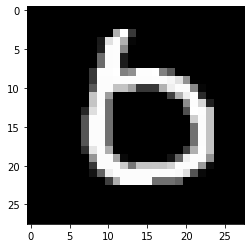

Prediction : 8 Actual : 0


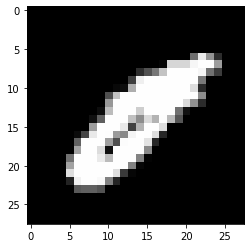

Prediction : 5 Actual : 6


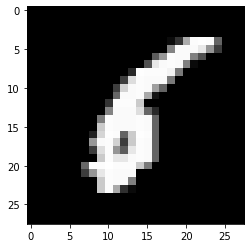

Prediction : 5 Actual : 8


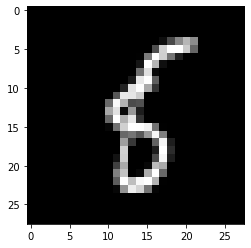

Prediction : 5 Actual : 3


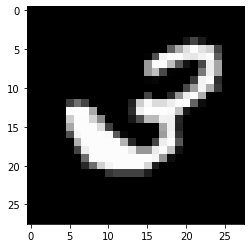

Prediction : 9 Actual : 8


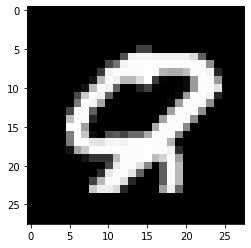

Prediction : 6 Actual : 0


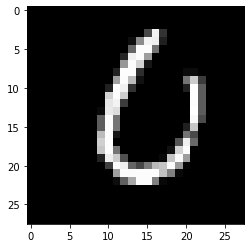

Prediction : 4 Actual : 1


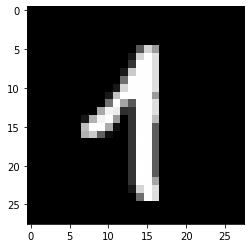

Prediction : 0 Actual : 7


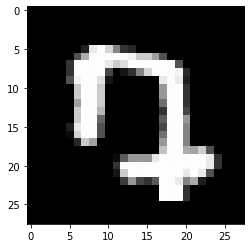

Prediction : 9 Actual : 8


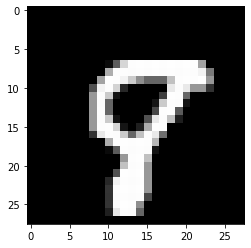

Prediction : 1 Actual : 3


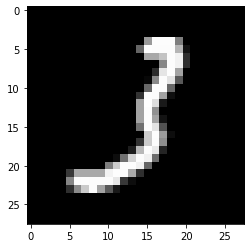

Prediction : 5 Actual : 3


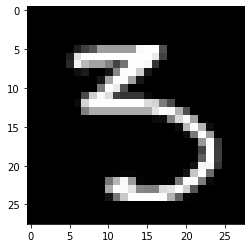

Prediction : 0 Actual : 9


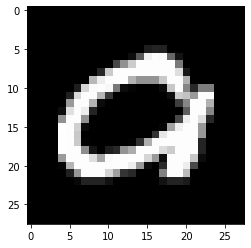

Prediction : 2 Actual : 7


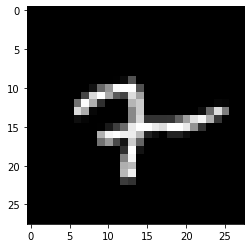

Prediction : 2 Actual : 3


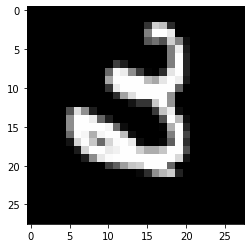

Prediction : 7 Actual : 3


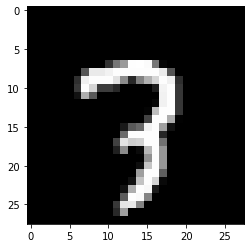

Prediction : 2 Actual : 1


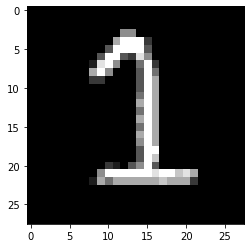

Prediction : 0 Actual : 1


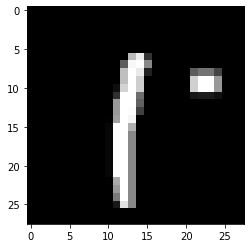

Prediction : 1 Actual : 4


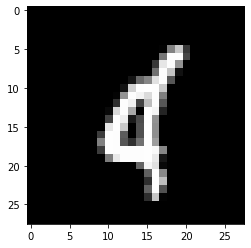

Prediction : 0 Actual : 2


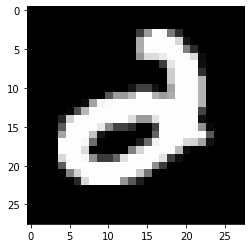

Prediction : 1 Actual : 6


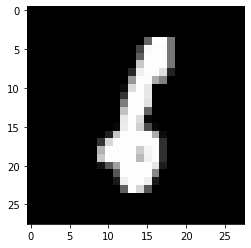

Prediction : 5 Actual : 1


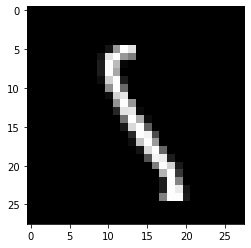

Prediction : 0 Actual : 6


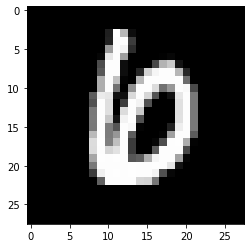

Prediction : 2 Actual : 3


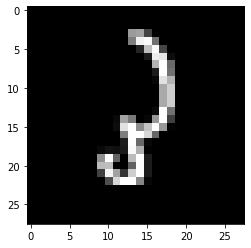

Prediction : 9 Actual : 7


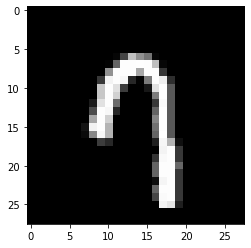

Prediction : 2 Actual : 7


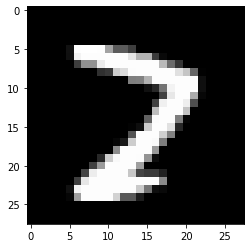

Prediction : 9 Actual : 5


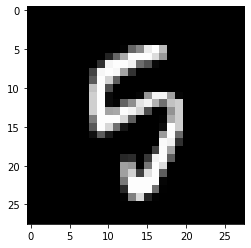

Prediction : 2 Actual : 7


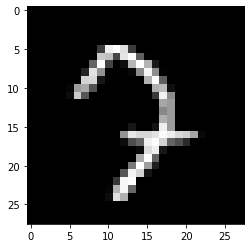

Prediction : 0 Actual : 8


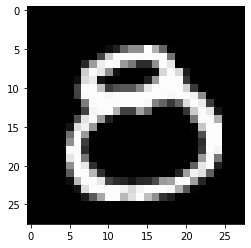

Prediction : 5 Actual : 0


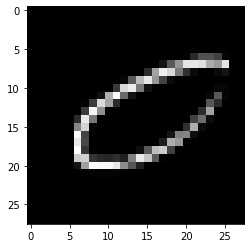

Prediction : 8 Actual : 9


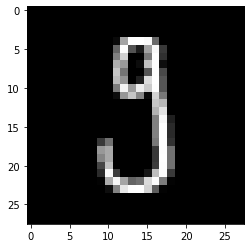

Prediction : 0 Actual : 7


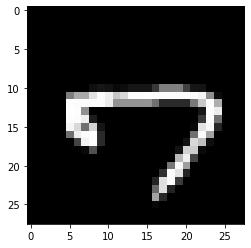

Prediction : 5 Actual : 3


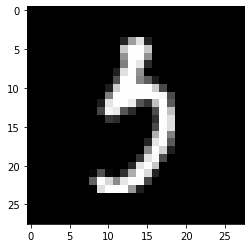

Prediction : 2 Actual : 8


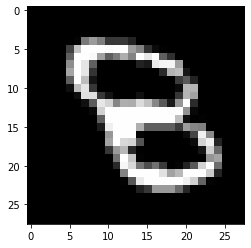

Prediction : 5 Actual : 6


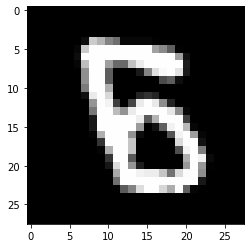

Prediction : 9 Actual : 7


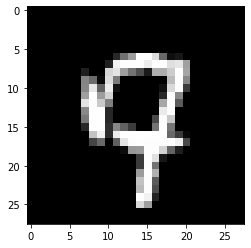

Prediction : 6 Actual : 5


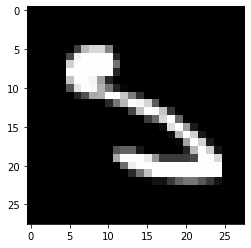

Prediction : 5 Actual : 3


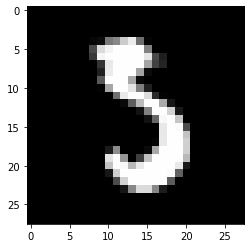

Prediction : 3 Actual : 5


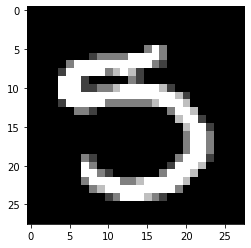

Prediction : 4 Actual : 9


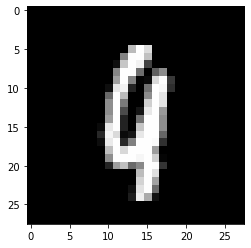

Prediction : 3 Actual : 0


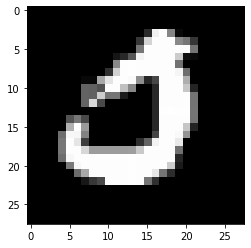

Prediction : 2 Actual : 6


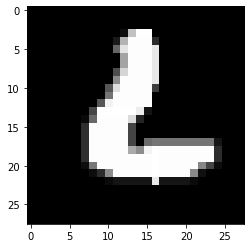

Prediction : 1 Actual : 7


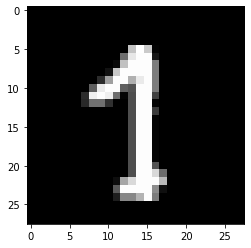

Prediction : 4 Actual : 9


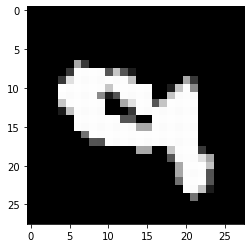

Prediction : 9 Actual : 7


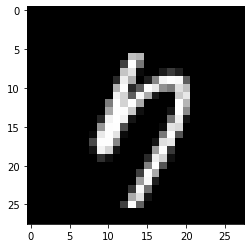

Prediction : 8 Actual : 3


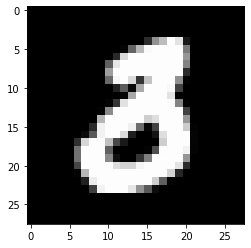

Prediction : 0 Actual : 8


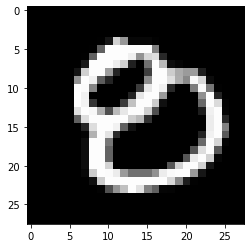

Prediction : 7 Actual : 2


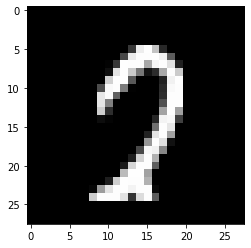

Prediction : 3 Actual : 9


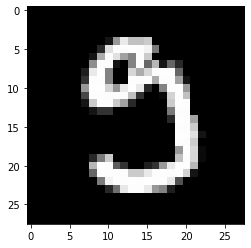

Prediction : 9 Actual : 4


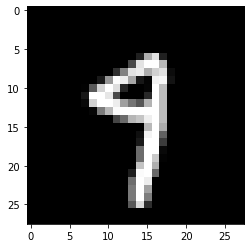

Prediction : 7 Actual : 2


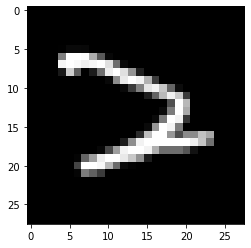

Prediction : 6 Actual : 0


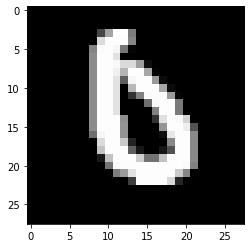

Prediction : 5 Actual : 3


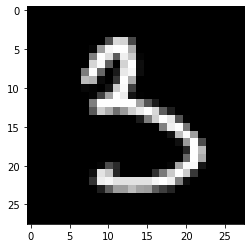

Prediction : 9 Actual : 7


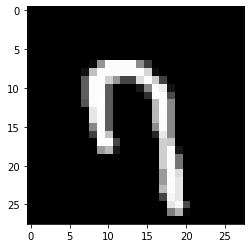

Prediction : 9 Actual : 4


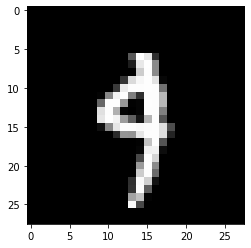

Prediction : 9 Actual : 4


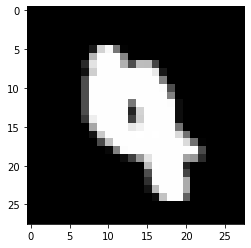

Prediction : 7 Actual : 3


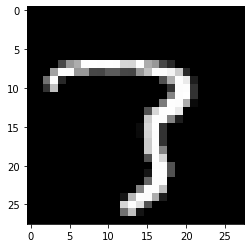

Prediction : 5 Actual : 6


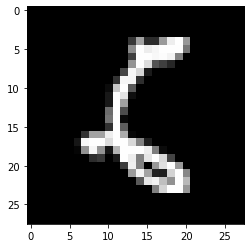

Prediction : 4 Actual : 6


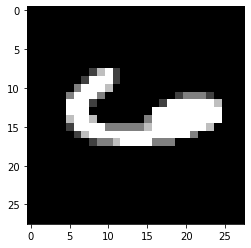

Prediction : 2 Actual : 7


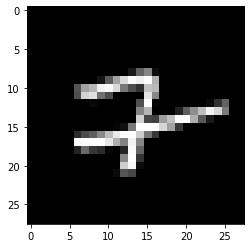

Prediction : 7 Actual : 4


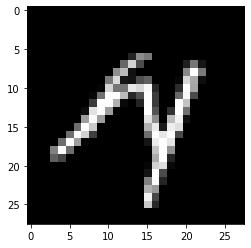

Prediction : 0 Actual : 2


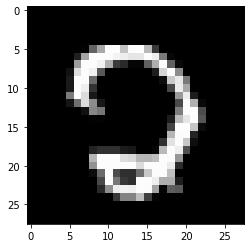

Prediction : 2 Actual : 7


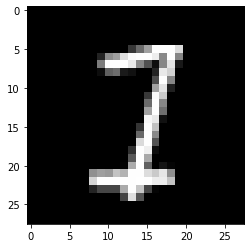

Prediction : 9 Actual : 0


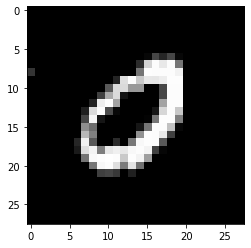

Prediction : 9 Actual : 3


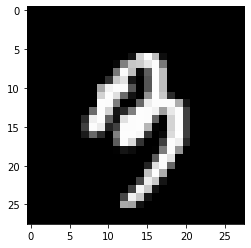

Prediction : 0 Actual : 8


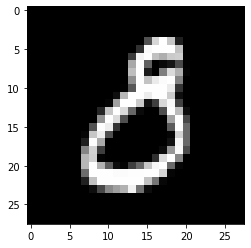

Prediction : 2 Actual : 7


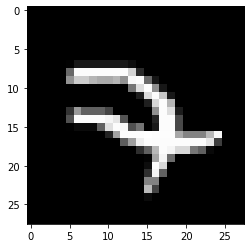

Prediction : 2 Actual : 7


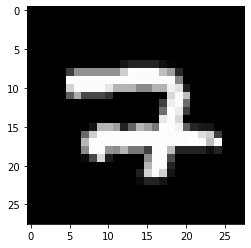

Prediction : 5 Actual : 6


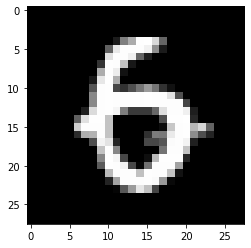

Prediction : 6 Actual : 0


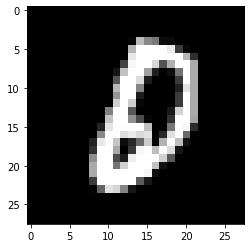

Prediction : 2 Actual : 3


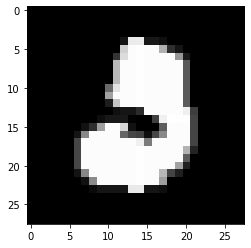

Prediction : 9 Actual : 8


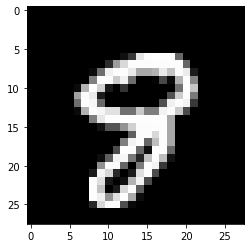

Prediction : 8 Actual : 1


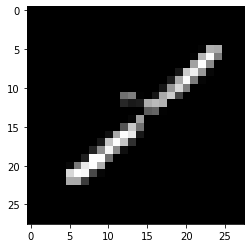

Prediction : 2 Actual : 7


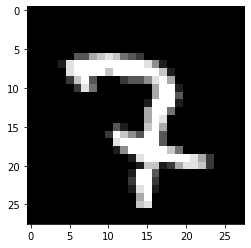

Prediction : 7 Actual : 4


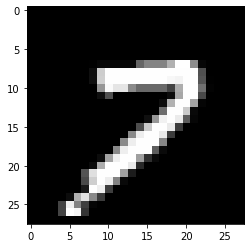

Prediction : 0 Actual : 2


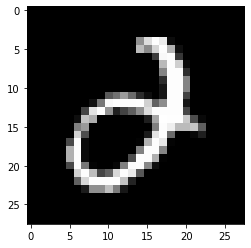

Prediction : 7 Actual : 9


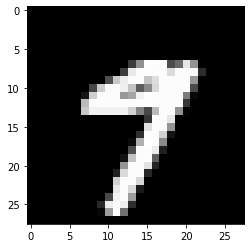

Prediction : 3 Actual : 2


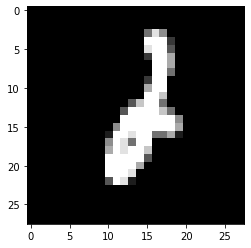

Prediction : 5 Actual : 8


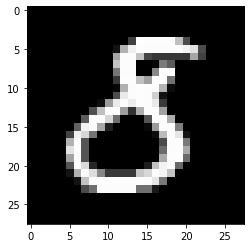

Prediction : 8 Actual : 9


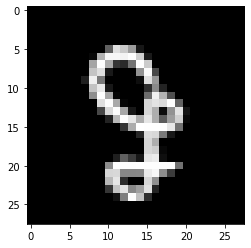

Prediction : 6 Actual : 4


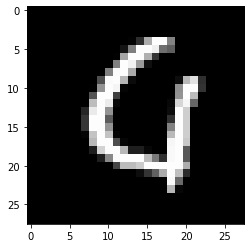

Prediction : 7 Actual : 9


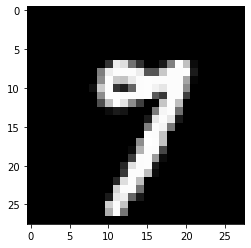

Prediction : 9 Actual : 4


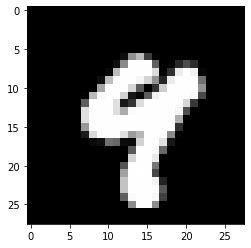

Prediction : 2 Actual : 5


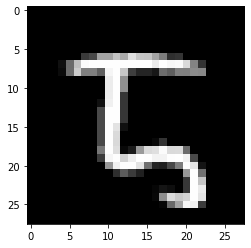

Prediction : 2 Actual : 7


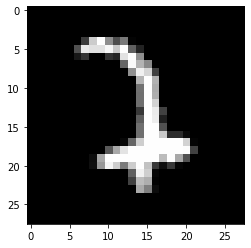

Prediction : 4 Actual : 6


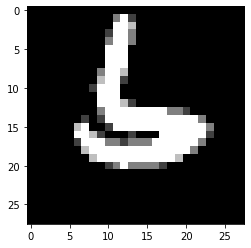

Prediction : 2 Actual : 7


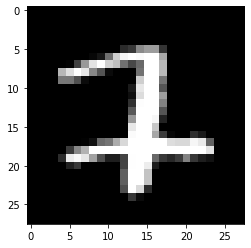

Prediction : 9 Actual : 5


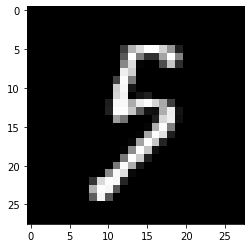

Prediction : 1 Actual : 8


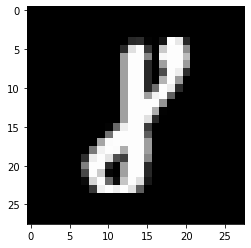

Prediction : 0 Actual : 9


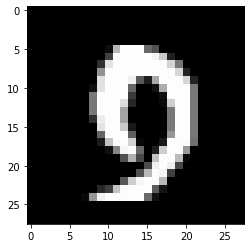

Prediction : 7 Actual : 9


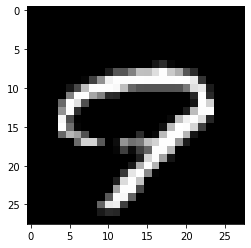

Prediction : 8 Actual : 5


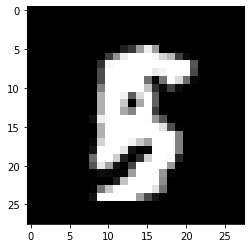

Prediction : 4 Actual : 0


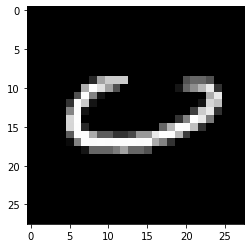

Prediction : 4 Actual : 9


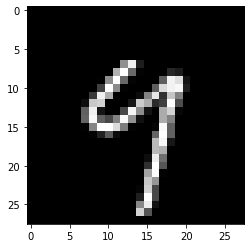

Prediction : 3 Actual : 7


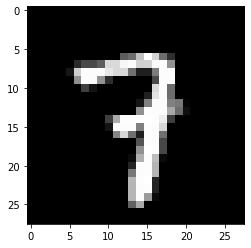

Prediction : 2 Actual : 1


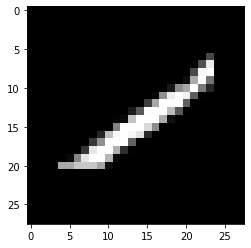

Prediction : 7 Actual : 9


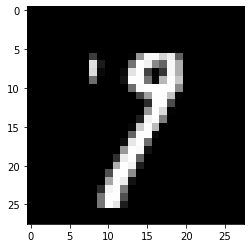

Prediction : 3 Actual : 8


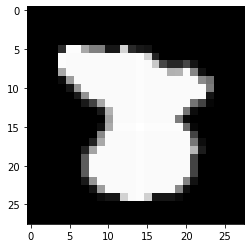

Prediction : 4 Actual : 8


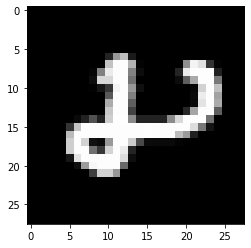

Prediction : 5 Actual : 6


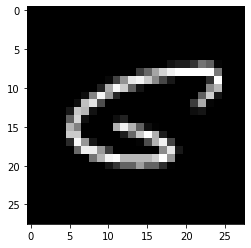

Prediction : 2 Actual : 0


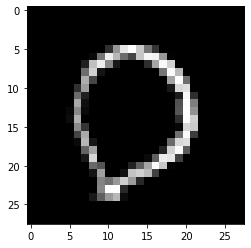

Prediction : 9 Actual : 3


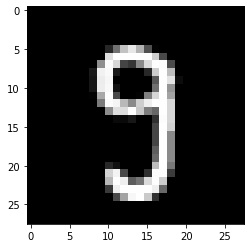

Prediction : 2 Actual : 7


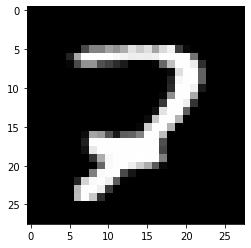

Prediction : 8 Actual : 9


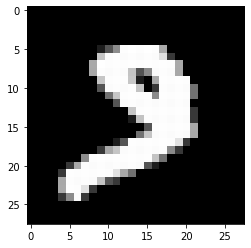

Prediction : 8 Actual : 5


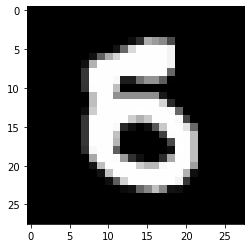

Prediction : 7 Actual : 1


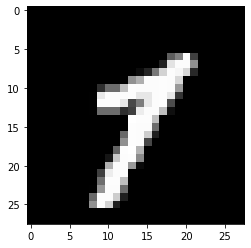

Prediction : 4 Actual : 9


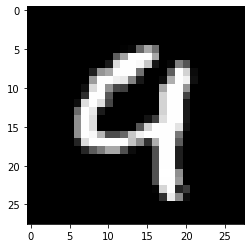

Prediction : 6 Actual : 5


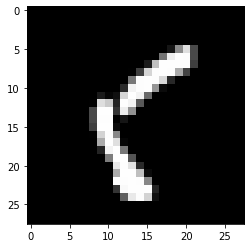

Prediction : 9 Actual : 3


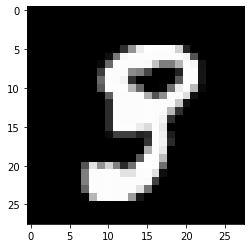

Prediction : 8 Actual : 5


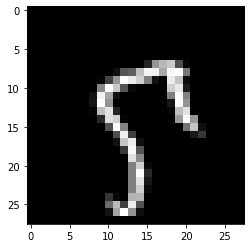

Prediction : 7 Actual : 3


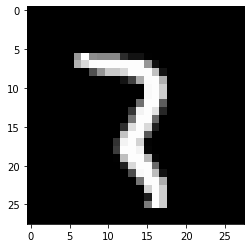

Prediction : 5 Actual : 3


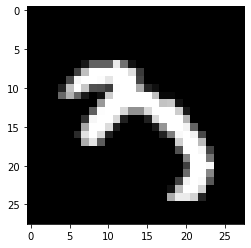

Prediction : 1 Actual : 2


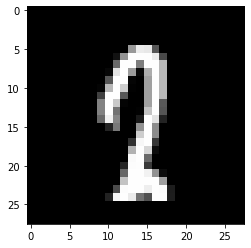

Prediction : 8 Actual : 2


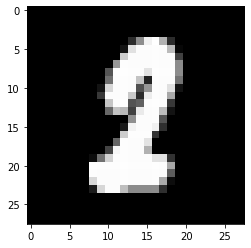

Prediction : 8 Actual : 2


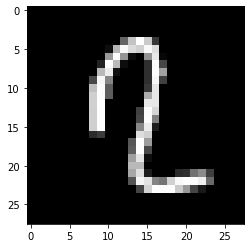

Prediction : 5 Actual : 3


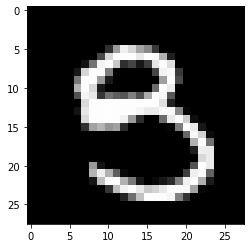

Prediction : 9 Actual : 4


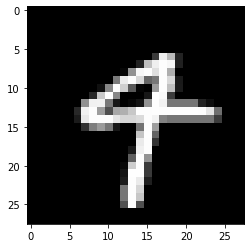

Prediction : 7 Actual : 3


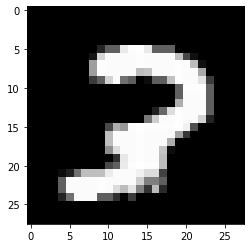

Prediction : 9 Actual : 0


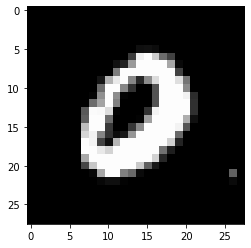

Prediction : 3 Actual : 7


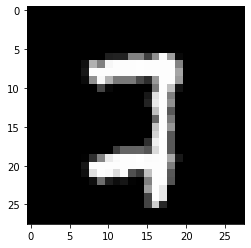

Prediction : 9 Actual : 5


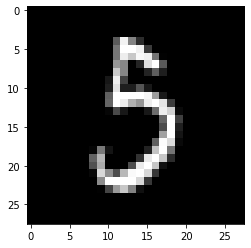

Prediction : 9 Actual : 8


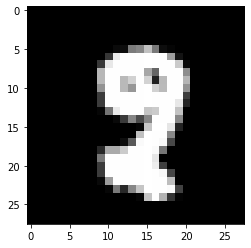

Prediction : 9 Actual : 5


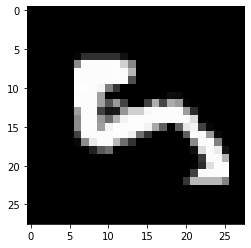

Prediction : 9 Actual : 1


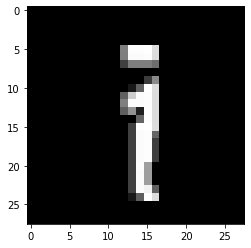

Prediction : 6 Actual : 8


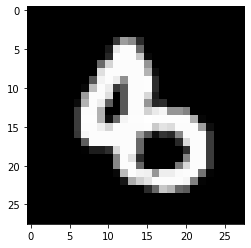

Prediction : 5 Actual : 3


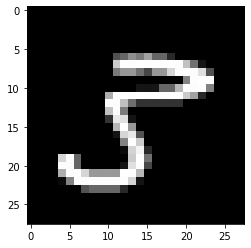

Prediction : 1 Actual : 2


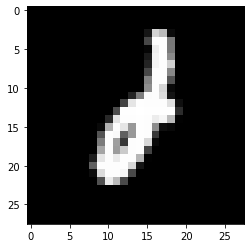

Prediction : 6 Actual : 5


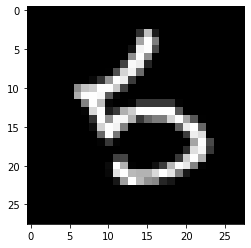

Prediction : 5 Actual : 8


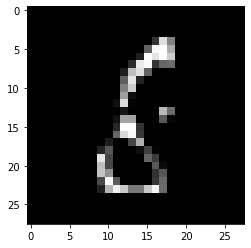

Prediction : 2 Actual : 1


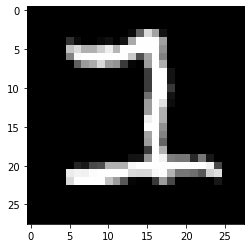

Prediction : 7 Actual : 2


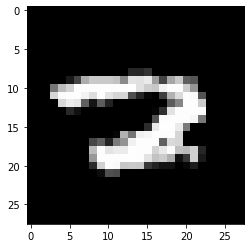

Prediction : 7 Actual : 9


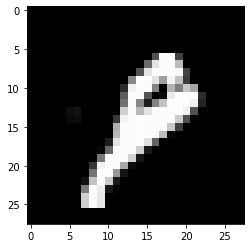

Prediction : 3 Actual : 2


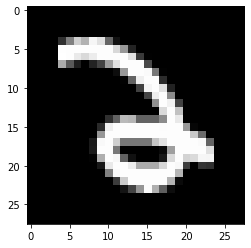

Prediction : 4 Actual : 1


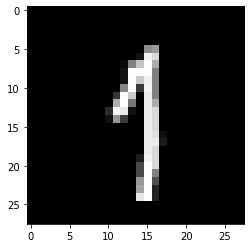

Prediction : 2 Actual : 0


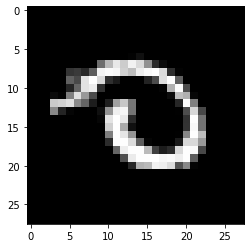

Prediction : 7 Actual : 2


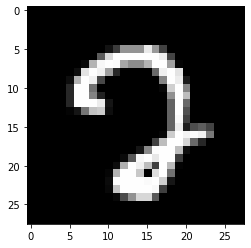

Prediction : 9 Actual : 4


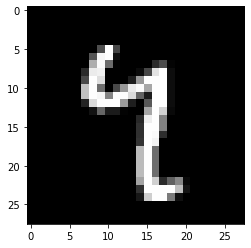

Prediction : 6 Actual : 4


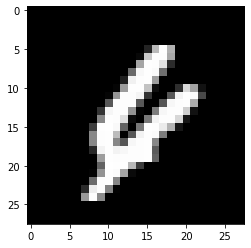

Prediction : 8 Actual : 7


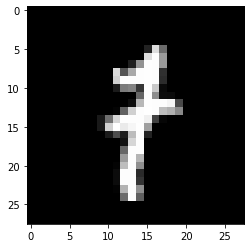

Prediction : 8 Actual : 5


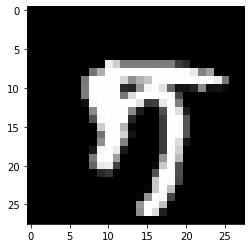

Prediction : 9 Actual : 4


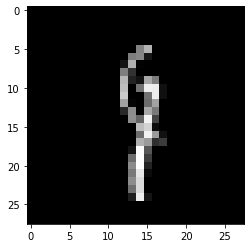

Prediction : 7 Actual : 3


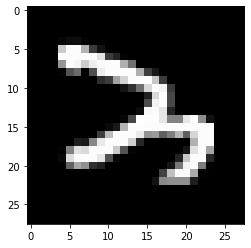

Prediction : 8 Actual : 9


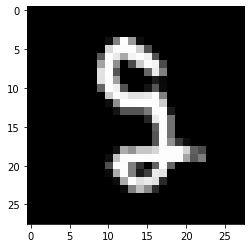

Prediction : 2 Actual : 7


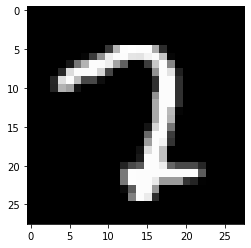

Prediction : 2 Actual : 7


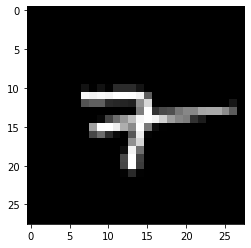

Prediction : 2 Actual : 8


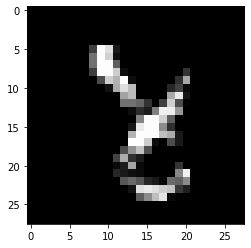

Prediction : 4 Actual : 9


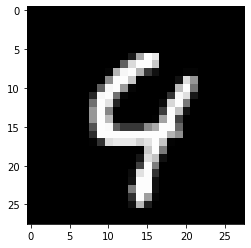

Prediction : 3 Actual : 5


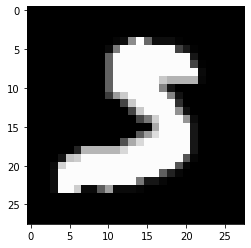

Accuracy : 98.23809523809524


In [17]:
y_prediction = tf.keras.backend.argmax(y_pred,axis = 1)
y_prediction.shape
correct = 0
for x,y,z in zip(y_prediction,y_test,X_test):
  if x==y:
    correct +=1
  else:
    print("Prediction : " + str(x.numpy()) + " Actual : " +str(y))
    plt.imshow(z.reshape((28,28)),cmap='gray')
    plt.show()
 #The images below represent the ones we got wrong

In [24]:
percentage = correct/len(y_test)*100
print("Accuracy : " + str(percentage))

Accuracy : 98.23809523809524


In [18]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


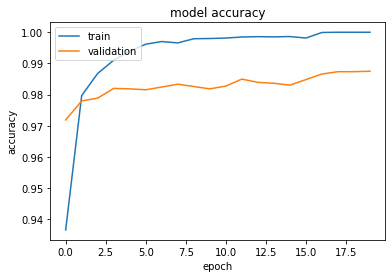

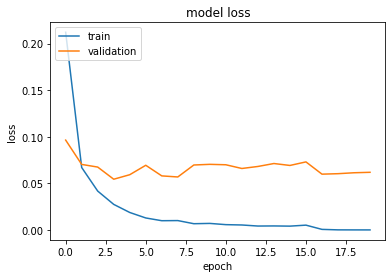

In [19]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

###Testing model on jpg

In [20]:
def load_image(filepath, size, color = "grayscale"):
  test_image = image.load_img(filepath, target_size = size, color_mode = color)
  test_image = image.img_to_array(test_image)
  test_image = test_image/255.0
  test_image = non_linear(test_image)
  plt.imshow(test_image.reshape(size), cmap='gray')
  plt.show()
  test_image = test_image.reshape((-1,size[0],size[1],1))
  return test_image

In [21]:
def compute_image (model, test_image):
  prediction = model.predict(test_image)
  print(prediction)
  output = tf.keras.backend.argmax(prediction, axis = 1)
  return output.numpy()

In [22]:
def non_linear(test_image):
  avg = np.sum(test_image)/(len(test_image)*len(test_image[0]))
  for x in range(len(test_image)):
    for y in range(len(test_image)):
        if(test_image[x,y,0]>0.45):
          test_image[x,y,0]=0
        else:
          test_image[x,y,0]=1
  
  return test_image

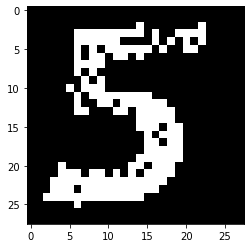

[[0.0000000e+00 6.1020711e-22 2.0099705e-30 7.5471021e-08 2.6363612e-35
  9.9999988e-01 1.4152922e-22 1.1515322e-24 1.5382750e-27 4.3318917e-28]]
The Model Predicts : 5


In [23]:
test_image = load_image('/content/drive/MyDrive/Kaggle/Digits/Purple_5.jpg',(28,28))
print("The Model Predicts : " + str(compute_image(cnn,test_image)[0]))